# 5.4 Reproduction of results from the literature

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm

from src.population_dynamics import *
from utils.rules import *
import matplotlib.colors as mcolors
import pickle

%matplotlib inline

plt.rcParams.update({'backend': 'pdf', 'font.size': 18, 'font.family': 'serif', 'text.latex.preamble': r'\usepackage{gensymb}',  'savefig.format':'pdf', 
                     'lines.linewidth': 2, 'lines.markersize':8, 'lines.markeredgewidth':2, 'figure.constrained_layout.w_pad': 2, 'figure.autolayout' : True})

In [22]:
rule=['+','+','0','0']

In [40]:
mu_list=np.linspace(6.4,6.8,30)
pop=population_dynamics_OT_torch(rule, mu=6)
for mu in tqdm(mu_list):
    pop_old=pop.population
    pop=population_dynamics_OT_torch(rule, m=1, mu=mu, damping_parameter=0.9, planted_messages=pop_old, fraction_planted_messages=0.5)
    pop.run()
    with open("results/reproduction_Rivoire/"+str(rule)+'mu'+str(mu), "wb") as file:
        pickle.dump(pop, file)    

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [19:49<00:00, 39.64s/it]


In [41]:
complexity_list=[]
complexity_list_std=[]
for mu in mu_list:
    with open("results/reproduction_Rivoire/"+str(rule)+'mu'+str(mu), "rb") as file:
        pop=pickle.load(file)
    complexity_list.append(pop.complexity_mean)
    complexity_list_std.append(pop.complexity_std)

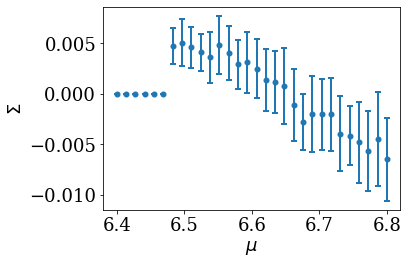

In [43]:
fig, ax=plt.subplots()
ax.errorbar(mu_list, complexity_list, yerr=complexity_list_std, fmt='.', capsize=3)
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\Sigma$');
plt.savefig('figures/sigma_vs_mu_Rivoire_smaller.pdf')

In [2]:
rho_s_list=[]
rho_d_list=[]
rules=[['+','+','0','0'], ['+','+','0','0','0'], ['+','+','0','0','0', '0'], ['+','+','0','0','0', '0', '0'], ['+','+','+','0'], ['+','+','+','0', '0'], ['+','+','+','0', '0', '0'], ['+','+','+','0', '0', '0', '0'], ['+','+','+','+', '0'], ['+','+','+','+', '0', '0'], ['+','+','+','+', '0', '0', '0'], ['+','+','+','+', '+', '0'], ['+','+','+','+', '+', '0', '0'], ['+','+','+','+', '+', '+', '0']]

In [ ]:
for rule in tqdm(rules):
    pop=population_dynamics_OT_torch(rule, m=1, mu=15)
    pop.compute_static_transition()
    with open("results/reproduction_Rivoire/"+str(rule), "wb") as file:
        pickle.dump(pop, file)

In [10]:
with open("results/reproduction_Rivoire/"+str(['+','+','0','0']), "rb") as file:
    pop=pickle.load(file)

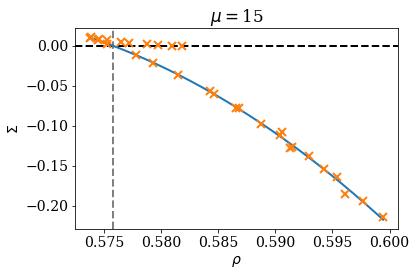

In [21]:
pop.draw_sigma_rho()
plt.savefig('figures/sigma_vs_rho_Rivoire.pdf')

In [5]:
rho_s_list=[]
for rule in rules:
    with open("results/reproduction_Rivoire/"+str(rule), "rb") as file:
        pop=pickle.load(file)
    rho_s_list.append(pop.rho_s)

In [6]:
rho_s_list_Rivoire=[0.575742,0.517288,0.473384,0.438382,0.735050,0.636187,0.573723,0.527301,0.776695,0.680316,0.617160,0.805338,0.713982,0.826487]

In [7]:
dic={'rho_s Rivoire': rho_s_list_Rivoire, 'rho_s numerical': rho_s_list}

In [9]:
pd.DataFrame(dic)

,rho_s Rivoire,rho_s numerical
0,0.575742,0.575812
1,0.517288,0.517173
2,0.473384,0.473240
3,0.438382,0.437935
4,0.735050,0.735988
5,0.636187,0.636184
6,0.573723,0.573878
7,0.527301,0.527340
8,0.776695,0.776789
9,0.680316,0.680319
